# HHL Algorithm 

## Example 1: A = {{3/4 1/4},{1/4 3/4}} and b = {0 1}

Solution for A x = b is x = {-1/2 3/2}.

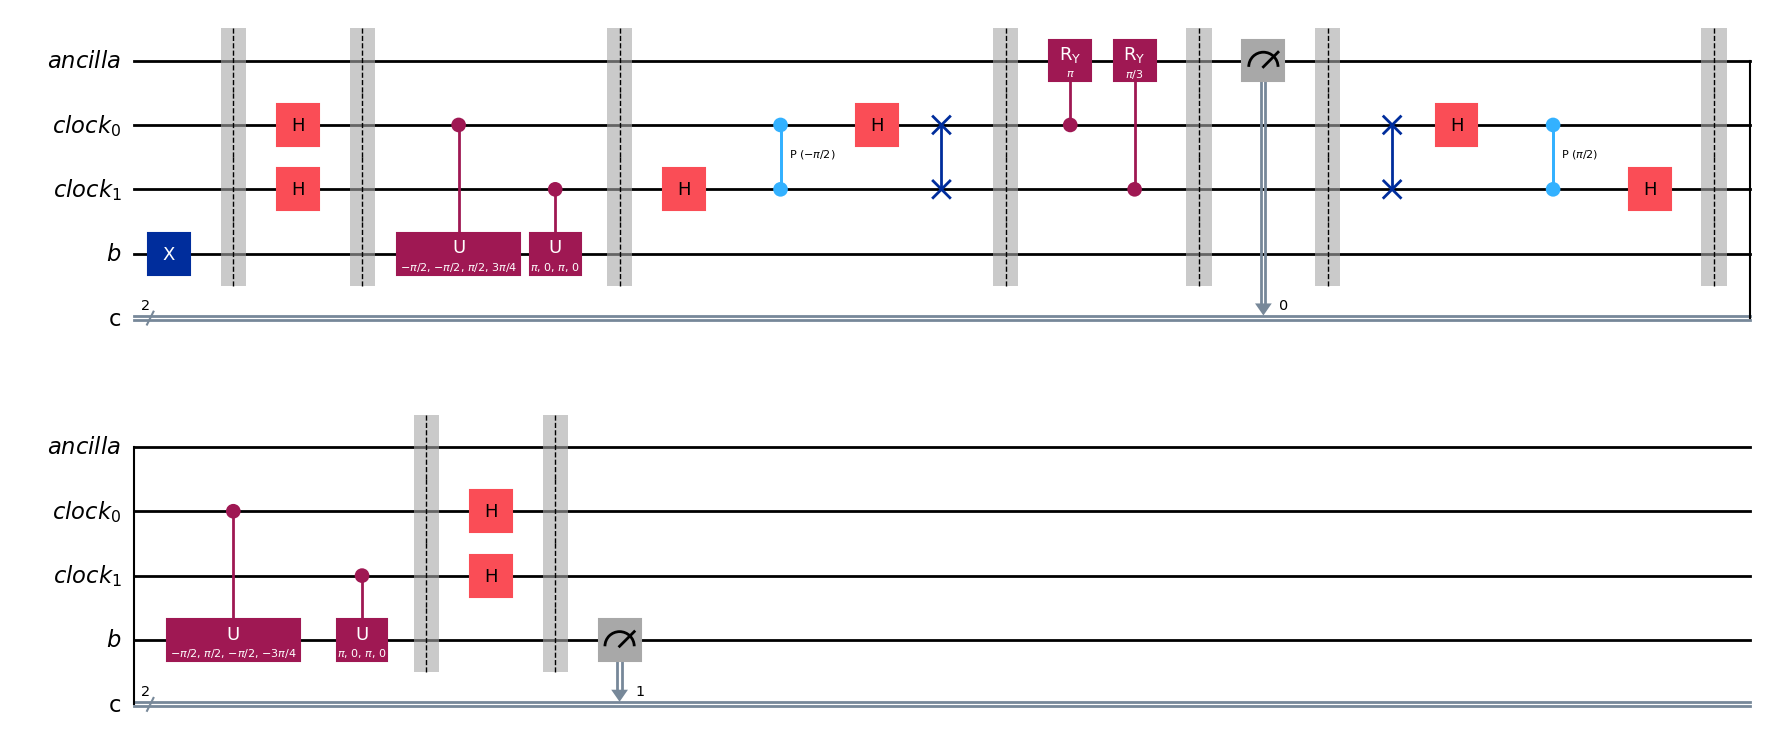

Measurement Results:{'11': 583, '00': 188, '10': 182, '01': 71}


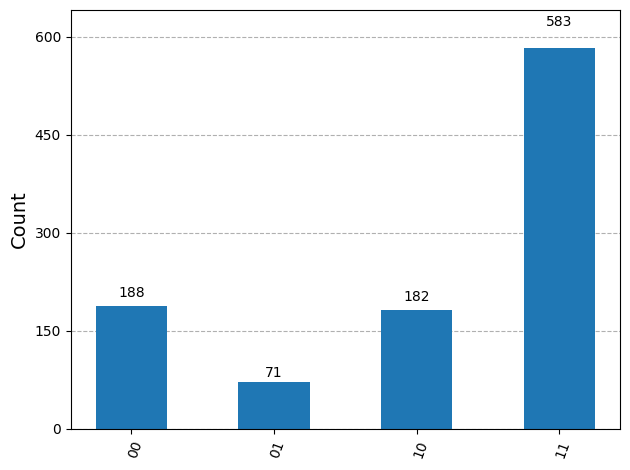

In [1]:
from qiskit_aer import AerSimulator
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.visualization import plot_histogram
import numpy as np
import math

#Initialization (a=ancilla, b= main , c=clock)
na=1
nb=1
nc=2
b=QuantumRegister(nb, name ='b')
clock=QuantumRegister(nc,name ='clock')
ancilla = QuantumRegister(na,name='ancilla')
measurement = ClassicalRegister(2,name='c')

qc = QuantumCircuit(ancilla,clock,b,measurement)
#qc=QuantumCircuit(4,2)

#Step 1: state preparation b={0 1} = |1>
qc.x(b)
qc.barrier()

#Step 2: QPE
#step2a: H gates
qc.h(clock)
qc.barrier()
# step 2b: Apply controlled U^2t gates
qc.cu(-math.pi/2, -math.pi/2, math.pi/2, 3/4 * math.pi, clock[0], b) #U
qc.cu(math.pi, 0, math.pi, 0, clock[1], b) #U^2
qc.barrier()
# Step 2c: Inverse QFT
qc.h(clock[1])
qc.cp(-math.pi/2, clock[0] , clock[1])
qc.h(clock[0])
qc.swap(clock[0],clock[1])
qc.barrier()

#Step 3a: Ancillary rotation using Controlled rotations
qc.cry(math.pi, clock[0], ancilla)
qc.cry(math.pi/3, clock[1], ancilla)
qc.barrier()

#step 3b:Ancillary measurement
qc.measure(ancilla,measurement[0])
qc.barrier()

#Step 4: IQPE
#step4a:QFT
qc.swap(clock[0],clock[1])
qc.h(clock[0])
qc.cp(math.pi/2,clock[0],clock[1])
qc.h(clock[1])
qc.barrier()
#step 4b: CU^-1 rotations
qc.cu(-math.pi/2, math.pi/2, -math.pi/2, -3/4 * math.pi, clock[0], b) #U^-1
qc.cu(math.pi, 0, math.pi, 0, clock[1], b) #U^-2
qc.barrier()
#step 4c: H operations
qc.h(clock)
qc.barrier()

#step 5: measurement of b vector
qc.measure(b,measurement[1])

#Display
display(qc.draw("mpl"))

# Simulation results
sim = AerSimulator()
result = sim.run([qc]).result()
counts = result.get_counts(0)
print(f"Measurement Results:{counts}")
plot_histogram(counts)


In [2]:
583/71

8.211267605633802

As we are measuring only magnitude ratios in quantum programs, we should get the (-1/2)^2/(3/2)^2 = 1/9, theoretically. In the above example, we got 1/8.211 .

## Example 2: A = {{1 -1/3},{-1/3 1}} and b ={0 1}

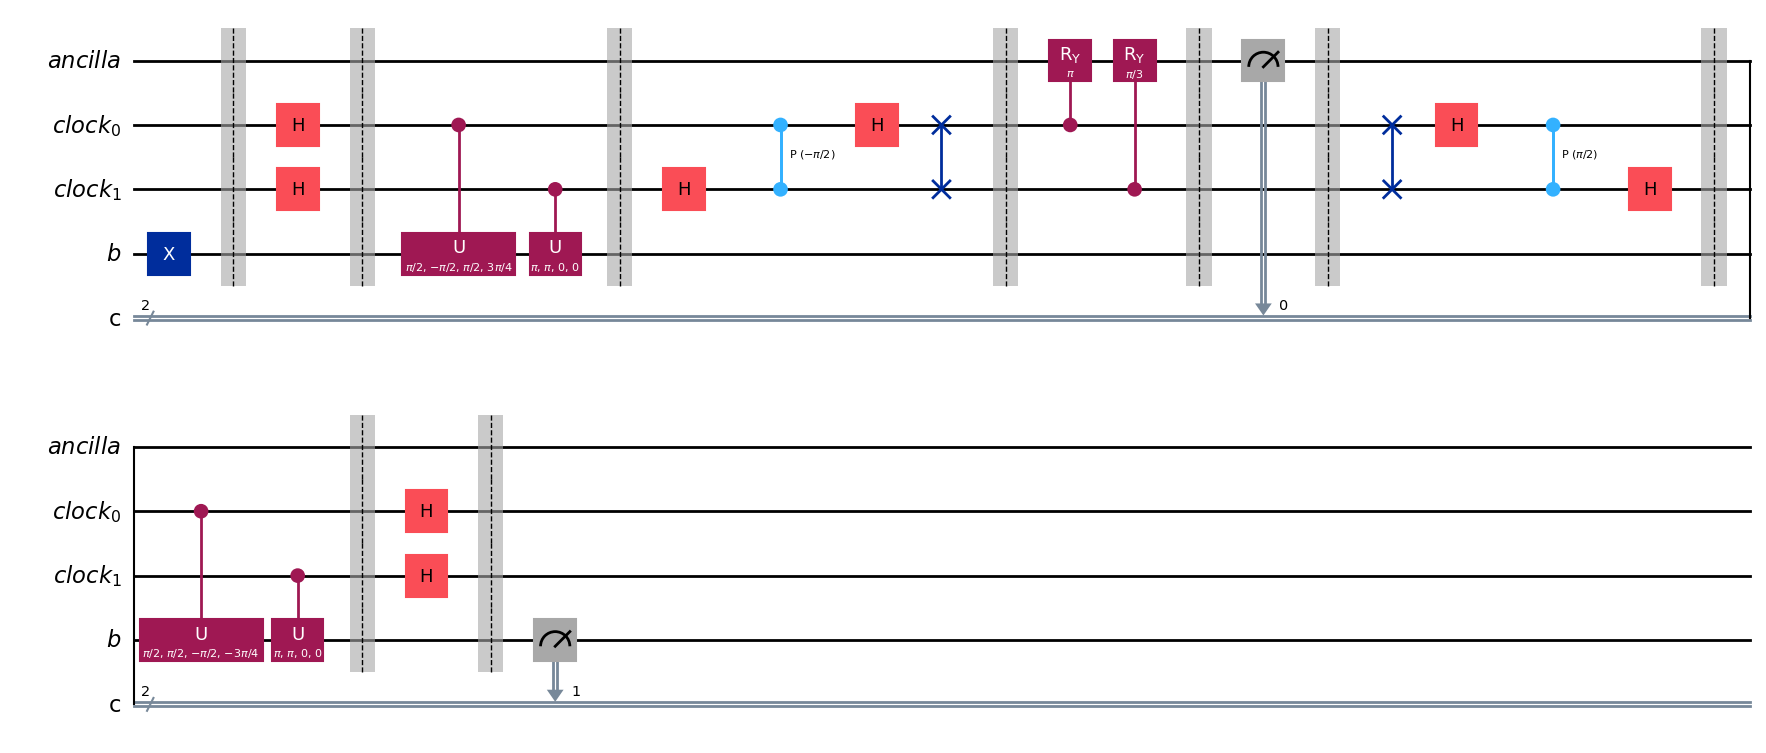

Measurement Results:{'00': 197, '11': 562, '10': 194, '01': 71}


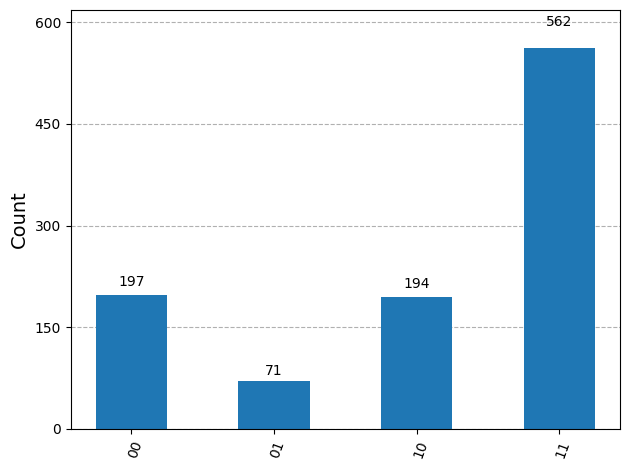

In [3]:
from qiskit_aer import AerSimulator
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.visualization import plot_histogram
import numpy as np
from math import pi

#Initialization
na=1
nb=1
nc=2
b=QuantumRegister(nb, name ='b')
clock=QuantumRegister(nc,name ='clock')
ancilla = QuantumRegister(na,name='ancilla')
measurement = ClassicalRegister(2,name='c')

qc = QuantumCircuit(ancilla,clock,b,measurement)
#qc=QuantumCircuit(4,2)

#Step 1: state preparation (b ={0 1})
qc.x(b)
qc.barrier()

#Step 2: QPE
#step2a: H gates
qc.h(clock)
qc.barrier()
# step 2b: Apply controlled U^2t gates
qc.cu(pi/2, -pi/2, pi/2, 3/4 * pi, clock[0], b) #U
qc.cu(pi, pi, 0, 0, clock[1], b) #U^2
qc.barrier()
# Step 2c: Inverse QFT
qc.h(clock[1])
qc.cp(-math.pi/2, clock[0] , clock[1])
qc.h(clock[0])
qc.swap(clock[0],clock[1])
qc.barrier()

#Step 3a: Ancillary rotation using Controlled rotations
qc.cry(math.pi, clock[0], ancilla)
qc.cry(math.pi/3, clock[1], ancilla)
qc.barrier()

#step 3b:Ancillary measurement
qc.measure(ancilla,measurement[0])
qc.barrier()

#Step 4: IQPE
#step4a:QFT
qc.swap(clock[0],clock[1])
qc.h(clock[0])
qc.cp(math.pi/2,clock[0],clock[1])
qc.h(clock[1])
qc.barrier()
#step 4b: CU^-1 rotations
qc.cu(math.pi/2, math.pi/2, -math.pi/2, -3/4 * math.pi, clock[0], b) #U^-1
qc.cu(math.pi, math.pi, 0, 0, clock[1], b) #U^-2
qc.barrier()
#step 4c: H operations
qc.h(clock)
qc.barrier()

#step 5: measurement of b vector
qc.measure(b,measurement[1])
    
display(qc.draw('mpl'))

# Simulation results
sim = AerSimulator()
result = sim.run([qc]).result()
counts = result.get_counts(0)
print(f"Measurement Results:{counts}")
plot_histogram(counts)


In [4]:
562/71

7.915492957746479

Even in this problem, the answer should be 1/9. Instead we got, 1/7.915.